In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2pwai9MaWJyYXJ5L0Nsb3VkU3RvcmFnZS9Ecm9wYm94L2Jsb2cvcG9zdHMvMjAyMy0xMi0xNC1uZmwtcGFyaXR5'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/var/folders/n2/m7_fj5vx6c50_yj7g23mwmq00000gn/T/ipykernel_56851/3280319107.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/importlib/_bootstrap.py": 1694574412.6564615, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/importlib/_bootstrap_external.py": 1694574412.6611667, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/zipimport.py": 1694574410.7775924, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/codecs.py": 1694574410.2208612, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/encodings/aliases.py": 1694574411.6929739, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/encodings/__init__.py": 1694574411.687787, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/encodings/utf_8.py": 1694574412.1652963, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/abc.py": 1694574410.153477, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/io.py": 1694574410.3361063, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/stat.py": 1694574410.6048596, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/_collections_abc.py": 1694574410.109986, "/Users/jpj/.pyenv/versions

In [2]:
#| label: load-data
import pandas as pd
import numpy as np
combined_df = pd.read_csv("assets/nfl_combined.csv")
combined_df.head()

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,...,Winner/tie,at,Loser/tie,Unnamed: 7,PtsW,PtsL,YdsW,TOW,YdsL,TOL
0,1999_01_MIN_ATL,1999,REG,1.0,1999-09-12,Sunday,NaN,MIN,17.0,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999_01_KC_CHI,1999,REG,1.0,1999-09-12,Sunday,NaN,KC,17.0,CHI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1999_01_PIT_CLE,1999,REG,1.0,1999-09-12,Sunday,NaN,PIT,43.0,CLE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1999_01_OAK_GB,1999,REG,1.0,1999-09-12,Sunday,NaN,OAK,24.0,GB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1999_01_BUF_IND,1999,REG,1.0,1999-09-12,Sunday,NaN,BUF,14.0,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Get the range of seasons from the df
first_year_full = combined_df['season'].min()
last_year_full = combined_df['season'].max()
print(first_year_full, last_year_full)
year_range_full = list(range(first_year_full, last_year_full + 1))
class Season:
    def __init__(self, year, team_id_list):
        self.year = year
        # Keys will be {year}_{team}
        self.teams = {team_id: SeasonTeam(team_id, self.year) for team_id in team_id_list}
        
    def __str__(self):
        all_teams = self.get_team_list()
        first_team = all_teams[0]
        last_team = all_teams[-1]
        return f"Season[year={self.get_year()},{self.get_num_teams()} teams: [{first_team}, ..., {last_team}]]"
    
    def __repr__(self):
        return self.__str__()
        
    def add_team(self, team_id):
        self.teams[team_id] = SeasonTeam(team_id, self.year)
        
    def get_num_teams(self):
        return len(self.get_team_list())
    
    def get_team(self, team_id):
        return self.teams[team_id]
    
    def get_team_list(self):
        return list(self.teams.keys())
    
    def get_team_record(self, team_id):
        return self.get_team(team_id).get_record()
    
    def get_year(self):
        return self.year
    
    def record_result(self, team_id, result):
        self.get_team(team_id).record_result(result)

class SeasonTeam:
    def __init__(self, team, year):
        self.team = team
        self.year = year
        # (w,l,t), first week starts at (0,0,0)
        self.record = np.array([0,0,0])
    
    def get_record(self):
        return self.record
    
    def record_result(self, result):
        new_record = self.get_record() + result
        self.set_record(new_record)
        
    def set_record(self, new_record):
        self.record = new_record

1987 2021


In [4]:
#| label: season-dict
unique_home = set(combined_df['away_team'].unique())
unique_away = set(combined_df['home_team'].unique())
unique_teams_set = unique_home.union(unique_away)
team_ids = sorted(list(unique_teams_set))
print(team_ids)
print(year_range_full)
seasons = {cur_year: Season(cur_year, team_ids) for cur_year in year_range_full}
print(seasons[1999])
print(seasons.keys())

['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN', 'DET', 'GB', 'HOU', 'IND', 'JAX', 'KC', 'LA', 'LAC', 'LAR', 'LV', 'MIA', 'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'OAK', 'PHI', 'PIT', 'SD', 'SEA', 'SF', 'STL', 'TB', 'TEN', 'WAS']
[1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
Season[year=1999,36 teams: [ARI, ..., WAS]]
dict_keys([1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])


In [5]:
#| label: helper-fns
# Ties count as 0.5 win and 0.5 loss
win_vec = np.array([1, 0, 0.5])
loss_vec = np.array([0, 1, 0.5])
def compute_win_pct(record_vec):
    if np.sum(record_vec) == 0:
        # No games played yet, win pct considered 0
        return 0
    total_wins = np.dot(record_vec, win_vec)
    total_losses = np.dot(record_vec, loss_vec)
    win_pct = total_wins / (total_wins + total_losses)
    return win_pct

def compare_records(record_a, record_b):
    pct_a = compute_win_pct(record_a)
    pct_b = compute_win_pct(record_b)
    if pct_a > pct_b:
        return 1
    if pct_b > pct_a:
        return -1
    return 0

In [6]:
#| label: season-loop
all_result_data = []
for row_index, row in combined_df.iterrows():
    cur_game_id = row['game_id']
    cur_season = row['season']
    season_obj = seasons[cur_season]
    cur_week = row['week']
    cur_away = row['away_team']
    cur_home = row['home_team']
    cur_result = row['result']
    #print(cur_away, cur_home, cur_result)
    away_pre_record = season_obj.get_team_record(cur_away)
    home_pre_record = season_obj.get_team_record(cur_home)
    away_better = compare_records(away_pre_record, home_pre_record)
    if away_better > 0:
        better_team = cur_away
    elif away_better < 0:
        better_team = cur_home
    else:
        better_team = "none"
    #print(cur_away, away_pre_record, cur_home, home_pre_record, away_better)
    if cur_result < 0:
        # Away team won
        winning_team = cur_away
        away_result = np.array([1,0,0])
        home_result = np.array([0,1,0])
    elif cur_result > 0:
        # Home team won
        winning_team = cur_home
        home_result = np.array([1,0,0])
        away_result = np.array([0,1,0])
    else:
        # Tie
        winning_team = "none"
        away_result = np.array([0,0,1])
        home_result = np.array([0,0,1])
    season_obj.record_result(cur_away, away_result)
    season_obj.record_result(cur_home, home_result)
    away_post_record = season_obj.get_team_record(cur_away)
    home_post_record = season_obj.get_team_record(cur_home)
    #print(cur_away, away_post_record, cur_home, home_post_record)
    # Now we can create the results data
    result_data = {
        'game_id': cur_game_id,
        'away_pre': away_pre_record,
        'home_pre': home_pre_record,
        'better_team': better_team,
        'winning_team': winning_team,
        'better_won': (better_team != "none") and (better_team == winning_team),
        'away_result': away_result,
        'home_result': home_result,
        'away_post': away_post_record,
        'home_post': home_post_record
    }
    all_result_data.append(result_data)

In [7]:
#| label: result-df
result_df = pd.DataFrame(all_result_data)
result_df.head()

,game_id,away_pre,home_pre,better_team,winning_team,better_won,away_result,home_result,away_post,home_post
0,1999_01_MIN_ATL,"[0, 0, 0]","[0, 0, 0]",none,MIN,False,"[1, 0, 0]","[0, 1, 0]","[1, 0, 0]","[0, 1, 0]"
1,1999_01_KC_CHI,"[0, 0, 0]","[0, 0, 0]",none,CHI,False,"[0, 1, 0]","[1, 0, 0]","[0, 1, 0]","[1, 0, 0]"
2,1999_01_PIT_CLE,"[0, 0, 0]","[0, 0, 0]",none,PIT,False,"[1, 0, 0]","[0, 1, 0]","[1, 0, 0]","[0, 1, 0]"
3,1999_01_OAK_GB,"[0, 0, 0]","[0, 0, 0]",none,GB,False,"[0, 1, 0]","[1, 0, 0]","[0, 1, 0]","[1, 0, 0]"
4,1999_01_BUF_IND,"[0, 0, 0]","[0, 0, 0]",none,IND,False,"[0, 1, 0]","[1, 0, 0]","[0, 1, 0]","[1, 0, 0]"


In [8]:
#| label: better-worse-df
result_comp_df = result_df[result_df['better_team'] != "none"].copy()
result_comp_df.head()

,game_id,away_pre,home_pre,better_team,winning_team,better_won,away_result,home_result,away_post,home_post
15,1999_02_PIT_BAL,"[1, 0, 0]","[0, 1, 0]",PIT,PIT,True,"[1, 0, 0]","[0, 1, 0]","[2, 0, 0]","[0, 2, 0]"
17,1999_02_JAX_CAR,"[1, 0, 0]","[0, 1, 0]",JAX,JAX,True,"[1, 0, 0]","[0, 1, 0]","[2, 0, 0]","[0, 2, 0]"
18,1999_02_SEA_CHI,"[0, 1, 0]","[1, 0, 0]",CHI,SEA,False,"[1, 0, 0]","[0, 1, 0]","[1, 1, 0]","[1, 1, 0]"
23,1999_02_OAK_MIN,"[0, 1, 0]","[1, 0, 0]",MIN,OAK,False,"[1, 0, 0]","[0, 1, 0]","[1, 1, 0]","[1, 1, 0]"
25,1999_02_WAS_NYG,"[0, 1, 0]","[1, 0, 0]",NYG,WAS,False,"[1, 0, 0]","[0, 1, 0]","[1, 1, 0]","[1, 1, 0]"


In [9]:
result_comp_df['better_won'].mean()

0.6188321787077619

In [10]:
from itables import show
result_comp_df['season'] = result_comp_df['game_id'].apply(lambda x: int(x.split("_")[0]))
mean_by_season = result_comp_df.groupby('season')['better_won'].mean().reset_index()
show(mean_by_season)

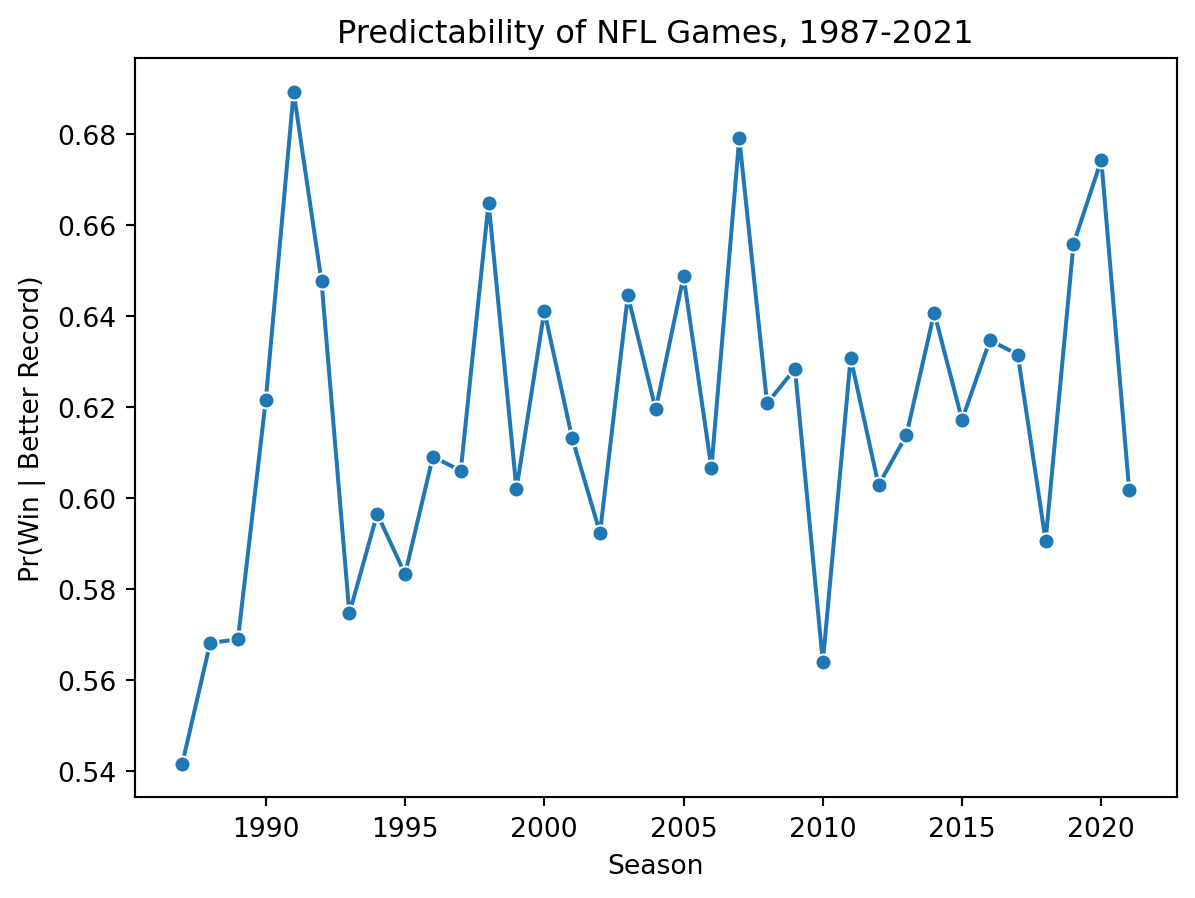

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.figure(figsize=(11,8))
season_plot = sns.lineplot(x='season', y='better_won', data=mean_by_season, marker='o')
#plt.xticks(rotation=45, ha='right')
plt.title("Predictability of NFL Games, 1987-2021")
plt.xlabel("Season")
plt.ylabel("Pr(Win | Better Record)")
plt.show()

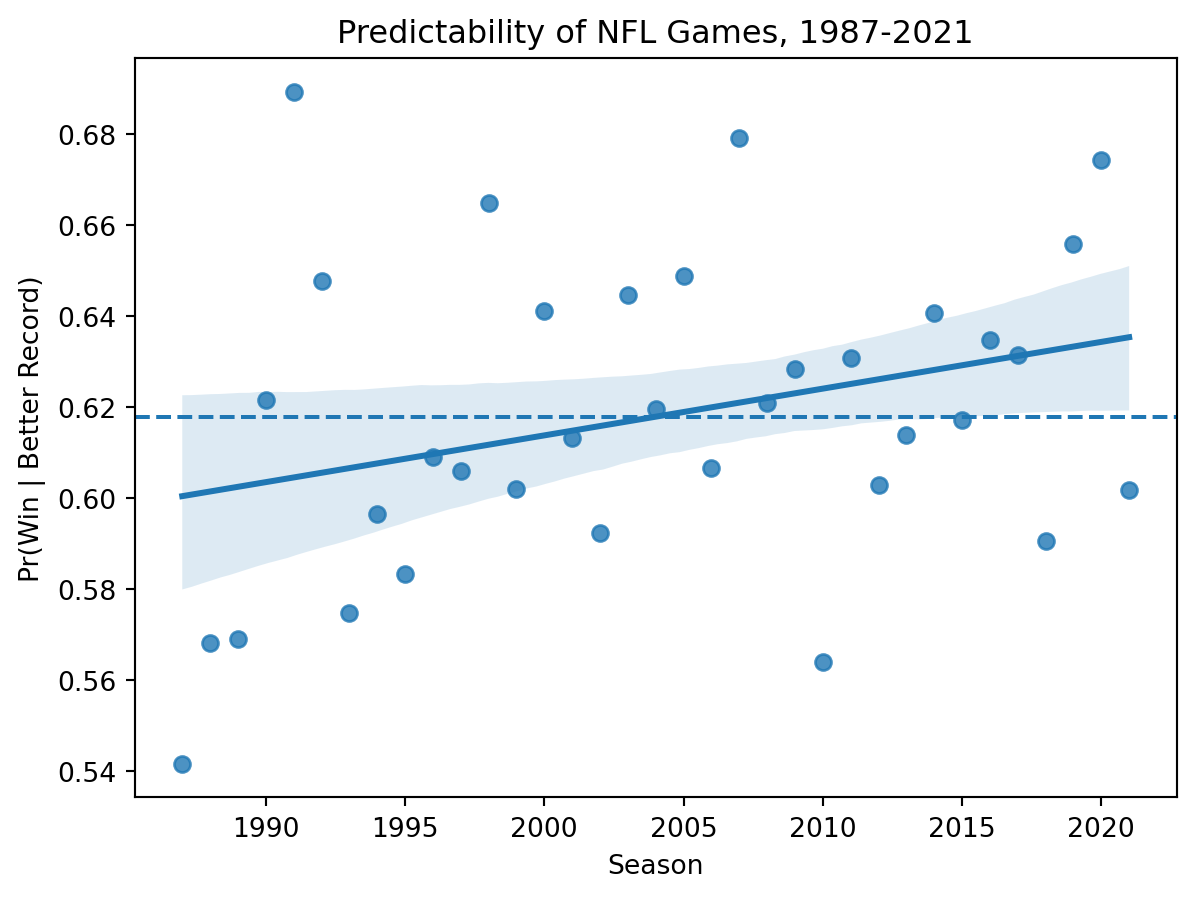

In [12]:
season_regplot = sns.regplot(x='season', y='better_won', data=mean_by_season, ci=89) #, lowess=True)
season_regplot.axhline(mean_by_season['better_won'].mean(), linestyle="dashed")
plt.title("Predictability of NFL Games, 1987-2021")
plt.xlabel("Season")
plt.ylabel("Pr(Win | Better Record)")
plt.show()